### This script contains:

#### 1. Import libraries & dataset
#### 2. Subset of columns
####  - including getting around Pythons 'copy of a slice' issue
#### 3. Setting up the clusters
#### 4. Creating ScatterPlots
#### 5. Clusters Min, Max, Mean and Median

## 1. Import libraries & dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
#Ensuring that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
#Folder path into usable string
path = r'C:\Users\willm\Dropbox\1 Data Analytics Course\1 New York Citibike Hire'

In [4]:
#Import Hire Dataset
NYB2020_1day = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'NYB2020_1dayScript3.pkl'))

In [5]:
NYB2020_1day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19487603 entries, 0 to 19506856
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start_station_id         int16  
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           int16  
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bikeid                   int32  
 12  usertype                 object 
 13  birth_year               int16  
 14  gender                   int8   
 15  start_hour               int8   
 16  start_date2              object 
 17  temp                     int8   
 18  rain_snow                float16
 19  day_of_week              object 
 20  day_of_week_number       int8   
 21  month 

## 2. Subset of columns

##### Due to the size of the dataset - 19 million entries - and Memory issues trying to make clusters and scatterplots I am going to take a slice of the dataset to work with.

In [6]:
np.random.seed(4)
dev = np.random.rand(len(NYB2020_1day)) <= 0.99

In [7]:
big = NYB2020_1day[dev]
small = NYB2020_1day[~dev]

In [8]:
len(big) + len(small)

19487603

In [9]:
NYB2020_1daySmall = small[['age', 'TripMins', 'temp', 'month_number', 'start_hour']]
NYB2020_1dayBig = big[['age', 'TripMins', 'temp', 'month_number', 'start_hour']]

##### Exporting and Importing the 'Small' subset so Python doesn't see it as a 'copy of a slice from a DataFrame'

In [10]:
NYB2020_1daySmall.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'NYB2020_1day_Small.pkl'))

In [11]:
NYB2020_1daySmall = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'NYB2020_1day_Small.pkl'))

## 3. Setting up the clusters

In [12]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [13]:
score = [kmeans[i].fit(NYB2020_1daySmall).score(NYB2020_1daySmall) for i in range(len(kmeans))]

score

[-194048816.4868998,
 -124293473.26980276,
 -92961732.79577884,
 -72569825.13593918,
 -55267388.897674374,
 -48781987.30388861,
 -43227951.675556965,
 -39098676.04981414,
 -35031098.964688174]

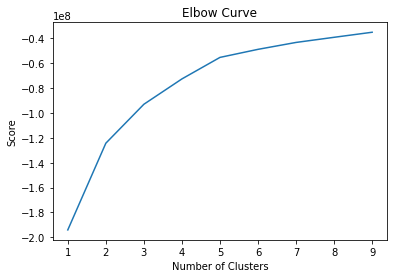

In [14]:
#Plotting the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### I am going to use 4 clusters, as the line seems to flatten out from there.

In [15]:
#Creating the k-means object
kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [16]:
#Fitting the k-means object to the data
kmeans.fit(NYB2020_1daySmall)

C:\Users\willm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [17]:
NYB2020_1daySmall['cluster'] = kmeans.fit_predict(NYB2020_1daySmall)

C:\Users\willm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [18]:
NYB2020_1daySmall.head()

,age,TripMins,temp,month_number,start_hour,cluster
149,26,7,3,1,0,0
545,51,9,3,1,1,3
566,27,12,3,1,1,0
631,51,15,3,1,1,3
634,56,25,3,1,1,3


In [19]:
NYB2020_1daySmall.tail(10)

,age,TripMins,temp,month_number,start_hour,cluster
19506036,43,4,7,12,22,3
19506094,34,12,7,12,22,0
19506102,43,23,7,12,22,3
19506106,38,6,7,12,22,0
19506140,42,4,7,12,22,3
19506188,32,13,7,12,22,0
19506234,37,25,7,12,22,0
19506554,49,8,7,12,23,3
19506763,27,3,7,12,23,0
19506843,51,6,7,12,23,3


In [20]:
NYB2020_1daySmall['cluster'].value_counts()

0    118438
3     72165
1      3901
2        95
Name: cluster, dtype: int64

## 4. Creating ScatterPlots

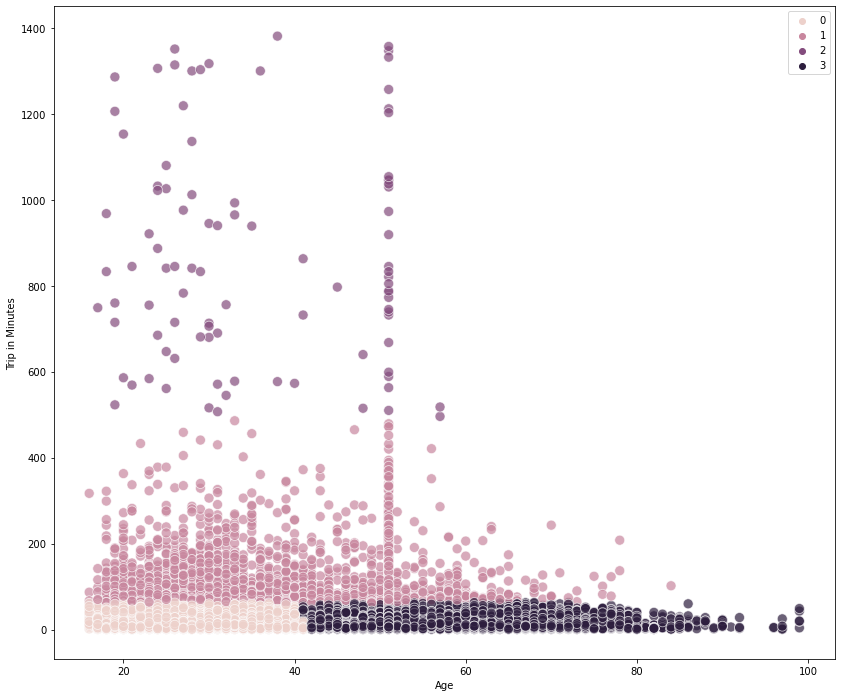

In [21]:
plt.figure(figsize=(14,12))
ax1 = sns.scatterplot(x=NYB2020_1daySmall['age'], y=NYB2020_1daySmall['TripMins'], hue=kmeans.labels_, s=100, alpha=0.7) 

ax1.grid(False)
plt.xlabel('Age')
plt.ylabel('Trip in Minutes')
plt.show()

### While it looks, from looking at clusters 1 and 2, like KMeans has made the clusters based around Trip Lengths, the 0 and 3 clusters are both spread across the shortest trip durations, but split into age groups.

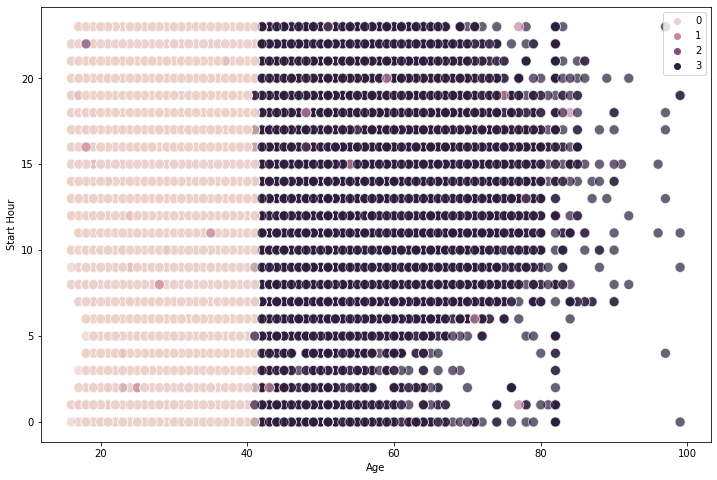

In [22]:
plt.figure(figsize=(12,8))
ax2 = sns.scatterplot(x=NYB2020_1daySmall['age'], y=NYB2020_1daySmall['start_hour'], hue=kmeans.labels_, s=100, alpha=0.7) 

ax2.grid(False)
plt.xlabel('Age')
plt.ylabel('Start Hour')
plt.show()

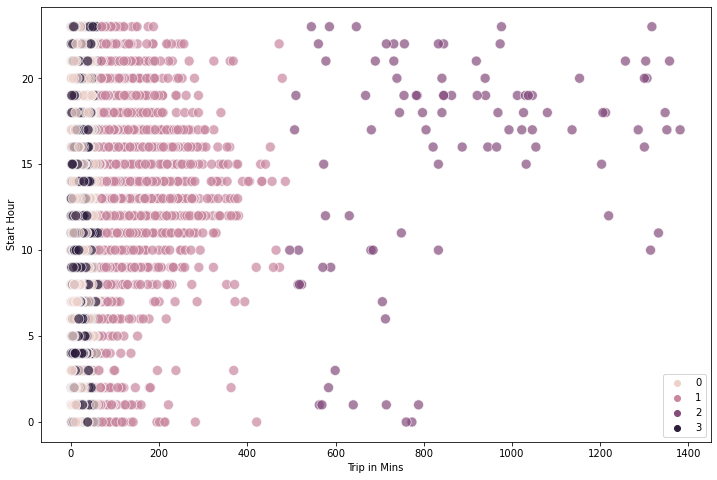

In [23]:
plt.figure(figsize=(12,8))
ax2_2 = sns.scatterplot(x=NYB2020_1daySmall['TripMins'], y=NYB2020_1daySmall['start_hour'], hue=kmeans.labels_, s=100, alpha=0.7) 

ax2_2.grid(False)
plt.xlabel('Trip in Mins')
plt.ylabel('Start Hour')
plt.show()

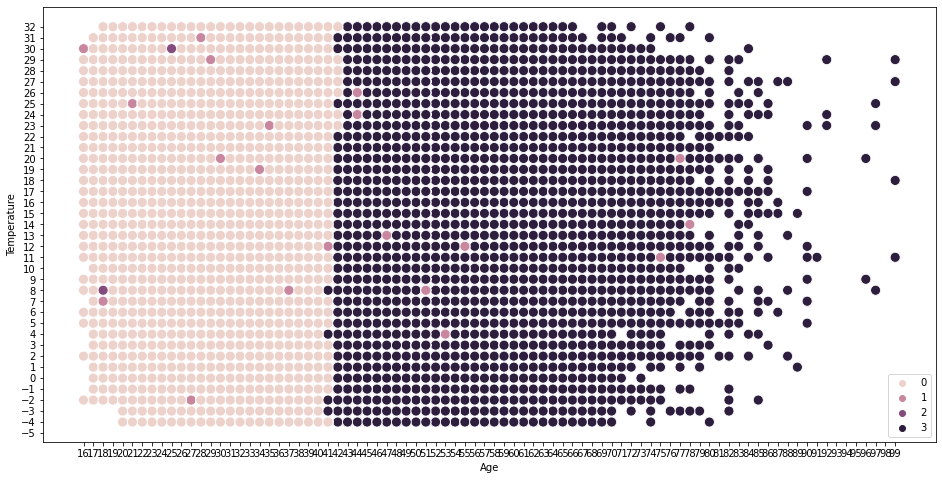

In [24]:
plt.figure(figsize=(16,8))
ax3 = sns.scatterplot(x=NYB2020_1daySmall['age'], y=NYB2020_1daySmall['temp'], hue=kmeans.labels_, s=100) 

ax3.grid(False)
plt.xlabel('Age')
plt.ylabel('Temperature')
plt.xticks(np.arange(16, 100, 1))
plt.yticks(np.arange(-5, 33, 1))
plt.show()

In [25]:

NYB2020_1daySmall.loc[NYB2020_1daySmall['cluster'] == 0, 'cluster_group'] = 'Younger_ShortTrips'
NYB2020_1daySmall.loc[NYB2020_1daySmall['cluster'] == 1, 'cluster_group'] = 'MediumTrips'
NYB2020_1daySmall.loc[NYB2020_1daySmall['cluster'] == 2, 'cluster_group'] = 'LongTrips'
NYB2020_1daySmall.loc[NYB2020_1daySmall['cluster'] == 3, 'cluster_group'] = 'Older_ShortTrips'


In [26]:
NYB2020_1daySmall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194599 entries, 149 to 19506843
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   age            194599 non-null  int16 
 1   TripMins       194599 non-null  int32 
 2   temp           194599 non-null  int8  
 3   month_number   194599 non-null  int8  
 4   start_hour     194599 non-null  int8  
 5   cluster        194599 non-null  int32 
 6   cluster_group  194599 non-null  object
dtypes: int16(1), int32(2), int8(3), object(1)
memory usage: 5.4+ MB


## 5. Clusters Min, Max, Mean and Median

In [27]:
NYB2020_1daySmall.groupby('cluster_group').agg({'temp':['mean', 'median', 'min', 'max'], 
                        'start_hour':['mean', 'median', 'min', 'max'],
                         'month_number':['mean', 'median', 'min', 'max']})

temp                start_hour                 \
                         mean median min max       mean median min max   
cluster_group                                                            
LongTrips           20.463158   23.0   1  31  15.505263   18.0   0  23   
MediumTrips         20.468598   22.0  -4  32  14.735452   15.0   0  23   
Older_ShortTrips    16.978591   18.0  -4  32  14.007414   15.0   0  23   
Younger_ShortTrips  17.735617   19.0  -4  32  14.436921   15.0   0  23   

                   month_number                 
                           mean median min max  
cluster_group                                   
LongTrips              7.336842    7.0   1  12  
MediumTrips            7.149449    7.0   1  12  
Older_ShortTrips       6.994596    7.0   1  12  
Younger_ShortTrips     7.162541    8.0   1  12

### While the Start Hour and Month does not change much between the clusters, it is interesting to note that long trips don't happen until it is atleast 1 degree.

In [28]:
NYB2020_1daySmall.groupby('cluster_group').agg({'TripMins':['mean', 'median', 'min', 'max'],
                            'age':['mean', 'median', 'min', 'max']})

TripMins                          age               
                          mean median  min   max       mean median min max
cluster_group                                                             
LongTrips           872.010526  833.0  496  1381  35.505263   31.0  17  57
MediumTrips         105.523712   84.0   61   486  39.900026   40.0  16  84
Older_ShortTrips     16.281937   13.0    1    63  52.419774   51.0  40  99
Younger_ShortTrips   15.876906   13.0    1    62  30.525178   30.0  16  42

### TripMins just clarifies that the Medium Trips start at the 61 minute mark, and the two clusters of short trips stop at 62 and 63 mins.
### Age is interesting as it shows that there are some 17 year olds in the long trips, with a max age of 57.